# Plot Stopping Power

In [1]:
import sys, os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy

In [2]:
## -------------------------------- ##
##        SET PLOTTING STYLE        ##
## -------------------------------- ##
matplotlib.rcParams['figure.figsize'] = 8.5,6
matplotlib.rcParams['figure.subplot.left'] = 0.15
matplotlib.rcParams['figure.subplot.right'] = 0.88
matplotlib.rcParams['figure.subplot.bottom'] = 0.15
matplotlib.rcParams['figure.subplot.top'] = 0.88
matplotlib.rcParams['axes.titlesize'] = 20
matplotlib.rcParams['axes.labelsize'] = 18
matplotlib.rcParams['axes.labelweight'] = 'normal'
matplotlib.rcParams['font.weight'] = 'normal' 
matplotlib.rcParams['font.family'] = 'serif'
matplotlib.rcParams['font.serif'] = 'Times New Roman'
matplotlib.rcParams['mathtext.fontset'] = 'cm'
matplotlib.rcParams['lines.linewidth'] = 2
matplotlib.rcParams['lines.markersize'] = 10
matplotlib.rcParams['xtick.labelsize'] = 16
matplotlib.rcParams['ytick.labelsize'] = 16
matplotlib.rcParams['xtick.major.size'] = 8
matplotlib.rcParams['ytick.major.size'] = 8
matplotlib.rcParams['xtick.minor.size'] = 4
matplotlib.rcParams['ytick.minor.size'] = 4
matplotlib.rcParams['xtick.minor.visible'] = True 
matplotlib.rcParams['ytick.minor.visible'] = True
matplotlib.rcParams['xtick.direction'] = 'in' 
matplotlib.rcParams['ytick.direction'] = 'in' 
matplotlib.rcParams['xtick.top'] = True 
matplotlib.rcParams['ytick.right'] = True
matplotlib.rcParams['xtick.major.pad'] = 6
matplotlib.rcParams['image.cmap'] = 'viridis'

# Electron Stopping in Si

- Collisional --> coulomb scattering leading to ionizaiton/excitation
- Radiative --> collisions with atoms/e- via bremmstrahhlung

Text(0, 0.5, 'Range [cm] ($\\rho$ = 2.0 g/cm$^{3}$) ')

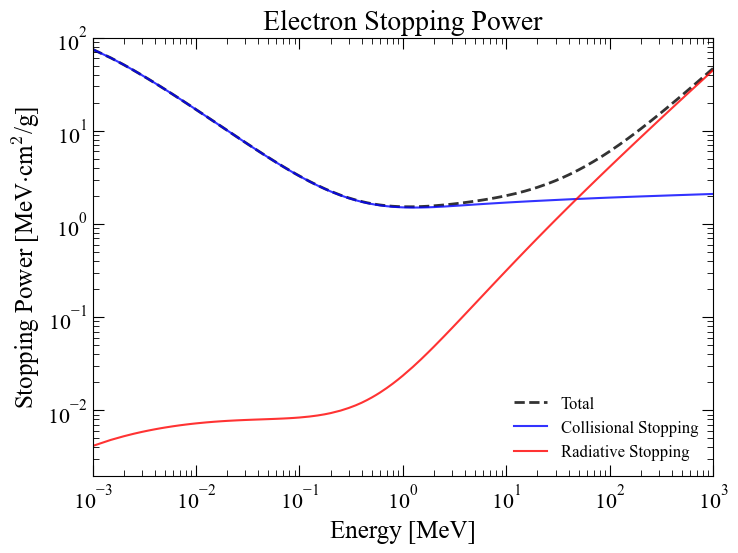

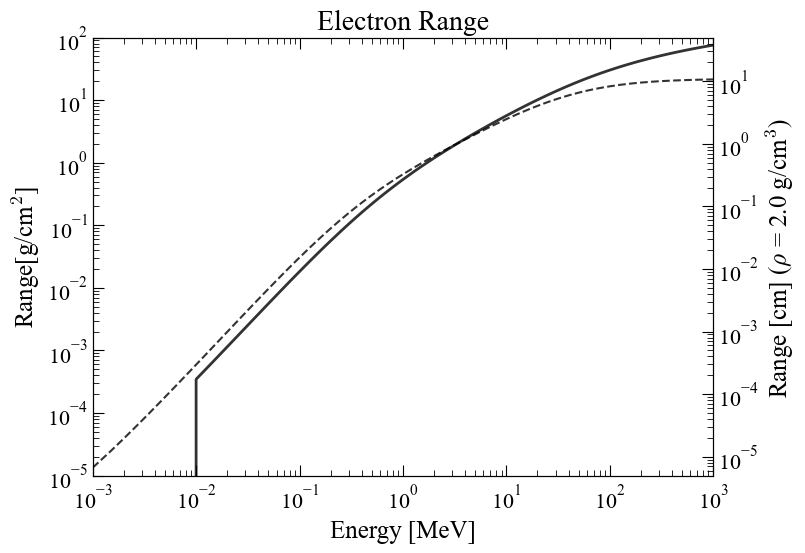

In [3]:
## READ IN THE DATA
Energy_MeV, CollStopping_MeVcm2g, RadStopping_MeVcm2g, TotStopping_MeVcm2g, Range_gcm2 = np.loadtxt('NIST_estar_Si.txt', skiprows=8, usecols=(0,1,2,3,4), unpack=True)

## Plot Stopping Power
fig, ax = plt.subplots(1,1, dpi=100)

ax.plot(Energy_MeV, TotStopping_MeVcm2g, color='black', ls='--', lw=2, alpha=0.8, label='Total')
ax.plot(Energy_MeV, CollStopping_MeVcm2g, color='blue', ls='-', lw=1.5, alpha=0.8, label='Collisional Stopping')
ax.plot(Energy_MeV, RadStopping_MeVcm2g, color='red', ls='-', lw=1.5, alpha=0.8, label='Radiative Stopping')

ax.set_title('Electron Stopping Power')
ax.set_xlabel('Energy [MeV]')
ax.set_ylabel(r'Stopping Power [MeV$\cdot$cm$^{2}$/g]')
ax.set_ylim(2e-3,1e2)
ax.set_xlim(1e-3,1e3)
ax.set_xscale('log')
ax.set_yscale('log')
ax.legend(frameon=False, loc='lower right', fontsize=12)

## Plot Mean Range Power
fig, ax = plt.subplots(1,1, dpi=100)

ax.plot(Energy_MeV, Range_gcm2, color='black', ls='-', lw=2, alpha=0.8)
ax.plot(Energy_MeV, 1/np.divide(TotStopping_MeVcm2g,Energy_MeV), color='black', ls='--', lw=1.5, alpha=0.8)

ax.set_title('Electron Range')
ax.set_xlabel('Energy [MeV]')
ax.set_ylabel(r'Range[g/cm$^{2}$]')
ax.set_ylim(1e-5,1e2)
ax.set_xlim(1e-3,1e3)
ax.set_xscale('log')
ax.set_yscale('log')

## Twin axis to convert range to cm for 2 g/cm^3 density Si
ax2 = ax.twinx()
ax2.set_ylim(ax.get_ylim()[0]/2, ax.get_ylim()[1]/2)
ax2.set_yscale('log')

ax2.set_ylabel(r'Range [cm] ($\rho$ = 2.0 g/cm$^{3}$) ')

# Photon Stopping in Si

- Coherent scattering --> Rayleigh
- Incoherent scattering --> Compton

Text(0, 0.5, 'Range [cm] ($\\rho$ = 2.0 g/cm$^{3}$) ')

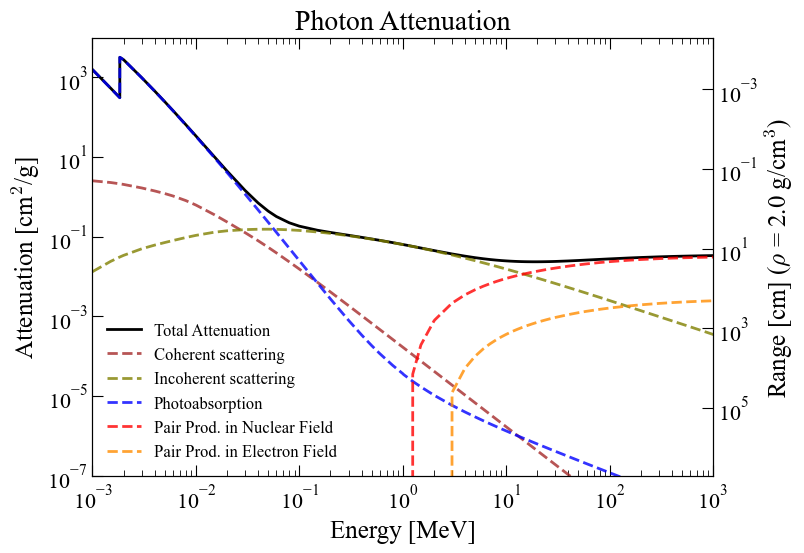

In [4]:
## READ IN THE DATA
Energy_MeV, coherentScat_cm2g, incoherentScat_cm2g, photoAbs_cm2g, pairProdNuc_cm2g, pairProdElec_cm2g, totCoherent_cm2g = np.loadtxt('NIST_xcom_Si.txt', skiprows=7, usecols=(0,1,2,3,4,5,6), unpack=True)

## Plot Stopping Power
fig, ax = plt.subplots(1,1, dpi=100)

ax.plot(Energy_MeV, totCoherent_cm2g, color='black', ls='-', lw=2, alpha=1, label='Total Attenuation')

ax.plot(Energy_MeV, coherentScat_cm2g, color='brown', ls='--', lw=2, alpha=0.8, label='Coherent scattering')
ax.plot(Energy_MeV, incoherentScat_cm2g, color='olive', ls='--', lw=2, alpha=0.8, label='Incoherent scattering')
ax.plot(Energy_MeV, photoAbs_cm2g, color='blue', ls='--', lw=2, alpha=0.8, label='Photoabsorption')
ax.plot(Energy_MeV, pairProdNuc_cm2g, color='red', ls='--', lw=2, alpha=0.8, label='Pair Prod. in Nuclear Field')
ax.plot(Energy_MeV, pairProdElec_cm2g, color='darkorange', ls='--', lw=2, alpha=0.8, label='Pair Prod. in Electron Field')

ax.set_title('Photon Attenuation')
ax.set_xlabel('Energy [MeV]')
ax.set_ylabel(r'Attenuation [cm$^{2}$/g]')
ax.set_ylim(1e-7,1e4)
ax.set_xlim(1e-3,1e3)
ax.set_xscale('log')
ax.set_yscale('log')
ax.legend(frameon=False, loc='lower left', fontsize=12)

## Twin axis to convert range to cm for 2 g/cm^3 density Si
ax2 = ax.twinx()
ax2.set_ylim(1/(ax.get_ylim()[0]*2), 1/(ax.get_ylim()[1]*2))
ax2.set_yscale('log')

ax2.set_ylabel(r'Range [cm] ($\rho$ = 2.0 g/cm$^{3}$) ')